<a href="https://colab.research.google.com/github/EndarMuh/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Endar Darmawan

Kelas : TI - 3F

Absen : 21

NIM : 2141720160

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **F. Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

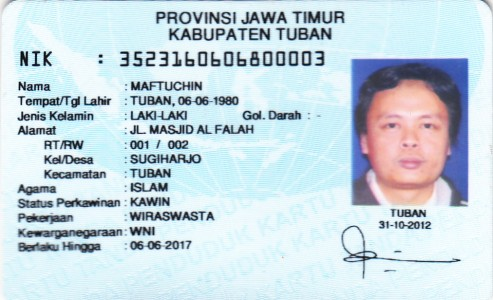

2. Muat 2 library berikut sebagai tahapan persiapan

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [ ]:
# Lokasi hasil pelat
path_plate = ("/content/drive/MyDrive/PCVK_2023/Week11")
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi


In [ ]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


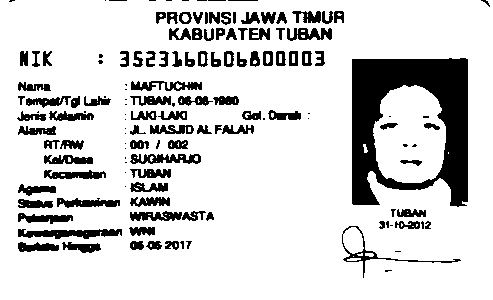

In [ ]:
erode = cv2.erode(bw.copy(),cv2.getStructuringElement(cv2.MORPH_OPEN,(1,1)))

cv2_imshow(erode)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

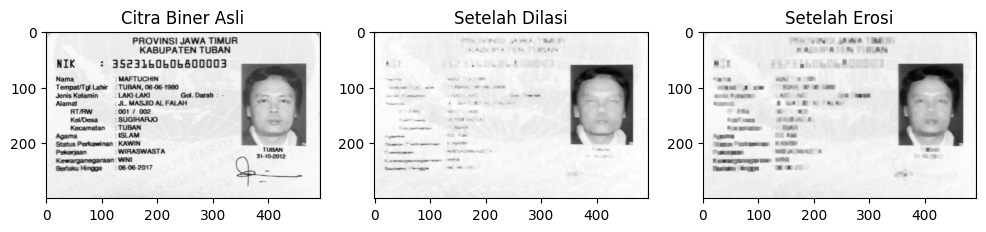

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra biner
binary_image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Week11/ktp3.png', cv2.IMREAD_GRAYSCALE)

# Definisikan kernel untuk operasi morfologi
kernel = np.ones((5, 5), np.uint8)  # Anda dapat menyesuaikan ukuran kernel sesuai kebutuhan

# Lakukan operasi dilasi
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Lakukan operasi erosi
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# Tampilkan citra asli dan hasil morfologi
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Asli')

plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Setelah Dilasi')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Setelah Erosi')

plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).


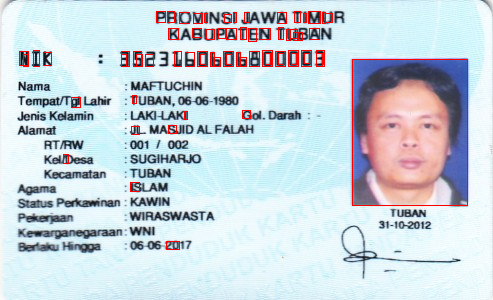

In [ ]:
import cv2

# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/PCVK_2023/Week11/ktp3.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(thresholded, 100, 200)

# Temukan kontur pada gambar tepi
contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 8 and w >= 3 and float(ras) <= 1:
      cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 9 and w >= 4 and float(ras) <= 1:
      cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Tampilkan gambar dengan kontur
cv2_imshow(ktpImage)

# **F. Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng


## **Kelompok 2 - KTP Galang Raka Bengkulu**

Anggota Kelompok 2 (TI-3F) :
1. Ahmad Bima Tristan Ibrahim (01 - 2141720077)
2. Alvina Marcy Syakirah Permata (03 - 2141720017)
3. Ananda Galih Pratiwi (05 - 2141720045)
4. Azis Ilham Kurniawan (08 - 2141720145)
5. Muhammad Endar Darmawan (21 - 2141720160)

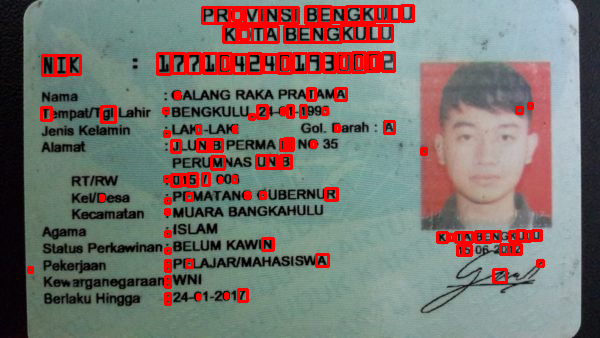

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow

ktp = cv.imread("/content/drive/MyDrive/PCVK_2023/Week11/ktp1.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 30 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 5 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 40 and w >= 2 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 60 and w >= 2 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)